In [106]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data

In [2]:
wine = pd.read_csv('https://storage.googleapis.com/dimensionless/Analytics/wine.csv')

In [3]:
wine.dtypes

Year             int64
Price          float64
WinterRain       int64
AGST           float64
HarvestRain      int64
Age              int64
FrancePop      float64
dtype: object

In [4]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [5]:
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


## Linear Regression (one variable)

In [244]:
model1 = sm.ols(formula='Price ~ AGST',data=wine).fit() # Or model1 = sm.ols('Price ~ AGST',data=wine).fit()

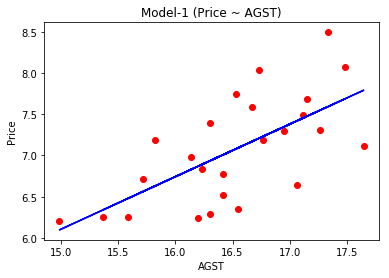

In [245]:
plt.plot(wine['AGST'],wine['Price'],'ro')
plt.plot(wine['AGST'],model1.fittedvalues,'b')
plt.xlabel('AGST')
plt.ylabel('Price')
plt.title('Model-1 (Price ~ AGST)')
plt.show()

In [246]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           0.000335
Time:                        00:24:57   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.184        -8.576     1.740
AGST           0.6351      0.151      4.208      0.000         0.323     0.947
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.790
Skew:                           0.055   Prob(JB):                        0.674
Kurtosis:                       2.136   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
model1.params

Intercept   -3.417761
AGST         0.635094
dtype: float64

In [249]:
model1.resid

0     0.042043
1     0.829838
2     0.211694
3     0.156094
4    -0.231191
5     0.389917
6    -0.489591
7     0.903181
8     0.453724
9     0.148875
10   -0.238822
11   -0.089742
12    0.661857
13   -0.052115
14   -0.627266
15   -0.747149
16    0.421135
17   -0.037274
18    0.106853
19   -0.784503
20   -0.640176
21   -0.055087
22   -0.670553
23   -0.220404
24    0.558665
dtype: float64

## Sum of Squared Errors

In [250]:
SSE = sum(model1.resid ** 2)
SSE

5.7348751470201202

In [251]:
RMSE = np.sqrt(SSE / len(wine))

In [252]:
RMSE

0.47895198703085551

# Linear Regression (two variables)

In [253]:
model2 = sm.ols('Price ~ AGST + HarvestRain', data=wine).fit()

In [254]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.35e-06
Time:                        00:26:00   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -2.2027      1.854     -1.188      0.248        -6.048     1.643
AGST            0.6026      0.111      5.415      0.000         0.372     0.833
HarvestRain    -0.0046      0.001     -4.525      0.000        -0.007    -0.002
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.096
Skew:                          -0.511   Prob(JB):                        0.578
Kurtosis:                       3.080   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sum of Squared Errors

In [255]:
SSE = sum(model2.resid ** 2)

In [256]:
SSE

2.9703733401735453

In [257]:
SST = sum((wine['Price'] - np.mean(wine['Price'])) ** 2)

In [258]:
SST

10.150637725599999

# Linear Regression (all variables)

In [259]:
model3 = sm.ols('Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop', data=wine).fit()

In [260]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.04e-06
Time:                        00:26:36   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      0.965       -21.776    20.875
AGST            0.6012      0.103      5.836      0.000         0.386     0.817
HarvestRain    -0.0040      0.001     -4.523      0.000        -0.006    -0.002
WinterRain      0.0010      0.001      1.963      0.064     -6.89e-05     0.002
Age             0.0006      0.079      0.007      0.994        -0.165     0.166
FrancePop   -4.953e-05      0.000     -0.297      0.770        -0.000     0.000
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sum of Squared Errors

In [261]:
SSE = sum(model3.resid ** 2)

In [262]:
SSE

1.732112715343795

# Quick Question

In [263]:
model_quick = sm.ols('Price~ HarvestRain + WinterRain',data=wine).fit()

In [264]:
model_quick.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     5.122
Date:                Fri, 09 Jun 2017   Prob (F-statistic):             0.0149
Time:                        00:26:51   Log-Likelihood:                -19.428
No. Observations:                  25   AIC:                             44.86
Df Residuals:                      22   BIC:                             48.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       7.8653      0.662     11.888      0.000         6.493     9.237
HarvestRain    -0.0050      0.002     -3.105      0.005        -0.008    -0.002
WinterRain  -9.848e-05      0.001     -0.109      0.914        -0.002     0.002
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.235
Skew:                           0.195   Prob(JB):                        0.889
Kurtosis:                       2.730   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
model_quick.params

Intercept      7.865325
HarvestRain   -0.004971
WinterRain    -0.000098
dtype: float64

# Remove FrancePop

In [266]:
model4 = sm.ols('Price ~ AGST + HarvestRain+WinterRain+Age', data=wine).fit()

In [267]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           2.04e-07
Time:                        00:27:06   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      0.066        -7.114     0.254
AGST            0.6072      0.099      6.152      0.000         0.401     0.813
HarvestRain    -0.0040      0.001     -4.652      0.000        -0.006    -0.002
WinterRain      0.0011      0.001      2.120      0.047      1.73e-05     0.002
Age             0.0239      0.008      2.956      0.008         0.007     0.041
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.04e-06
Time:                        00:27:07   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      0.965       -21.776    20.875
AGST            0.6012      0.103      5.836      0.000         0.386     0.817
HarvestRain    -0.0040      0.001     -4.523      0.000        -0.006    -0.002
WinterRain      0.0010      0.001      1.963      0.064     -6.89e-05     0.002
Age             0.0006      0.079      0.007      0.994        -0.165     0.166
FrancePop   -4.953e-05      0.000     -0.297      0.770        -0.000     0.000
==============================================================================
Omnibus:                        1.769   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.026
Skew:                          -0.005   Prob(JB):                        0.599
Kurtosis:                       2.008   Cond. No.                     8.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
import statsmodels.api as sm_api
table = sm_api.stats.anova_lm(model3,model4)

In [270]:
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,19.0,1.732113,0.0,NaN,NaN,NaN
1,20.0,1.740162,-1.0,-0.008049,0.092514,NaN


# Correlations

In [271]:
np.corrcoef(wine['WinterRain'],wine['Price'])[0][1]

0.13665054738762955

In [273]:
from scipy.stats.stats import pearsonr
pearsonr(wine['WinterRain'],wine['Price'])[0]

0.13665054738762958

In [274]:
np.corrcoef(wine['Age'], wine['FrancePop'])[0][1]

-0.99448509711145472

In [275]:
pd.DataFrame.corr(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [276]:
model5 = sm.ols('Price ~ AGST + HarvestRain + WinterRain', data=wine).fit()

In [277]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.42
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.36e-06
Time:                        00:30:12   Log-Likelihood:                -6.6922
No. Observations:                  25   AIC:                             21.38
Df Residuals:                      21   BIC:                             26.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -4.3016      2.037     -2.112      0.047        -8.537    -0.066
AGST            0.6810      0.112      6.097      0.000         0.449     0.913
HarvestRain    -0.0039      0.001     -3.953      0.001        -0.006    -0.002
WinterRain      0.0012      0.001      1.987      0.060     -5.47e-05     0.002
==============================================================================
Omnibus:                        0.621   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.419
Skew:                          -0.303   Prob(JB):                        0.811
Kurtosis:                       2.810   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [278]:
model6 = sm.ols('Price ~ AGST + HarvestRain + WinterRain+ FrancePop', data=wine).fit()

In [279]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     24.30
Date:                Fri, 09 Jun 2017   Prob (F-statistic):           1.95e-07
Time:                        00:30:18   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             14.21
Df Residuals:                      20   BIC:                             20.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.3768      2.180     -0.173      0.865        -4.925     4.171
AGST            0.6011      0.099      6.073      0.000         0.395     0.808
HarvestRain    -0.0040      0.001     -4.646      0.000        -0.006    -0.002
WinterRain      0.0010      0.001      2.055      0.053     -1.58e-05     0.002
FrancePop   -5.075e-05    1.7e-05     -2.978      0.007     -8.63e-05 -1.52e-05
==============================================================================
Omnibus:                        1.763   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.024
Skew:                          -0.006   Prob(JB):                        0.599
Kurtosis:                       2.009   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
model7 = sm.ols('Price~Age+FrancePop',data=wine).fit()

In [281]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.527
Date:                Fri, 09 Jun 2017   Prob (F-statistic):             0.0469
Time:                        00:30:19   Log-Likelihood:                -20.731
No. Observations:                  25   AIC:                             47.46
Df Residuals:                      22   BIC:                             51.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.5369     18.158      1.461      0.158       -11.121    64.195
Age           -0.1270      0.150     -0.849      0.405        -0.437     0.183
FrancePop     -0.0003      0.000     -1.108      0.280        -0.001     0.000
==============================================================================
Omnibus:                        2.602   Durbin-Watson:                   2.699
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.330
Skew:                           0.191   Prob(JB):                        0.514
Kurtosis:                       1.936   Cond. No.                     7.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
wineTest = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/wine_test.csv")

In [283]:
wineTest.dtypes

Year             int64
Price          float64
WinterRain       int64
AGST           float64
HarvestRain      int64
Age              int64
FrancePop      float64
dtype: object

In [284]:
predictTest = model4.predict(wineTest)

In [285]:
predictTest

array([ 6.76892463,  6.6849104 ])

In [286]:
wineTest['Price']

0    6.9541
1    6.4979
Name: Price, dtype: float64

# Compute R-squared

In [287]:
SSE = sum((wineTest['Price'] - predictTest) ** 2)

In [288]:
SST = sum((wineTest['Price'] - np.mean(wine['Price'])) ** 2)

In [289]:
1 - SSE / SST

0.79442776026319639

# Prediction using  model2

In [300]:
predict_model2 = model2.predict(wineTest)

In [301]:
SSE = sum((wineTest['Price'] - predict_model2) ** 2)

In [302]:
SST = sum((wineTest['Price'] - np.mean(wine['Price'])) ** 2)

In [303]:
1 - SSE / SST

-0.081999476673916716

In [304]:
wineTest.to_csv('wine_write.csv')

# FeaturePlot

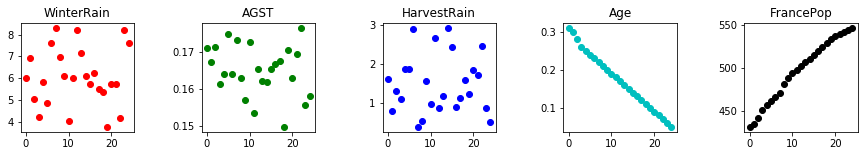

In [305]:
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,2))

plt.subplot(151)
plt.plot(wine['WinterRain'] / 100,'ro')
plt.title('WinterRain')

plt.subplot(152)
plt.plot(wine['AGST'] / 100,'go')
plt.title('AGST')

plt.subplot(153)
plt.plot(wine['HarvestRain'] / 100,'bo')
plt.title('HarvestRain')

plt.subplot(154)
plt.plot(wine['Age'] / 100,'co')
plt.title('Age')

plt.subplot(155)
plt.plot(wine['FrancePop'] / 100,'ko')
plt.title('FrancePop')

fig.subplots_adjust(wspace=.6)

# VIF

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [171]:
def dmatrices_custom(target,features,dataframe):
    return dmatrices(target + '~' + features,dataframe,return_type='dataframe')

In [176]:
def vif_factor(X_frame):
    return [variance_inflation_factor(X_frame.values, i) for i in range(X.shape[1])]

In [226]:
def show_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = vif_factor(X)
    vif["Features"] = X.columns
    return vif[vif.columns.tolist()[::-1]][1:].T

In [172]:
target = 'Price' ## Common target variable

## Model-2  (Price ~ AGST + HarvestRain)

In [228]:
data = wine[['Price','AGST','HarvestRain']]

In [229]:
features = 'AGST+HarvestRain'

In [230]:
y, X = dmatrices_custom(target,features,data)

In [231]:
show_vif(X)

,1,2
Features,AGST,HarvestRain
VIF Factor,1.00418,1.00418


## Model - 3 (Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop)

In [232]:
data = wine[['Price','AGST','HarvestRain','WinterRain','Age','FrancePop']]

In [233]:
features = 'AGST+HarvestRain+WinterRain+Age+FrancePop'

In [234]:
y, X = dmatrices_custom(target,features,data)

In [235]:
show_vif(X)

,1,2,3,4,5
Features,AGST,HarvestRain,WinterRain,Age,FrancePop
VIF Factor,1.27454,1.11658,1.2988,97.2197,98.2527


## Model - 4 (Price ~ AGST + HarvestRain + WinterRain + Age)

In [236]:
data = wine[['Price','AGST','HarvestRain','WinterRain','Age']]

In [237]:
features = 'AGST+HarvestRain+WinterRain+Age'

In [238]:
y, X = dmatrices_custom(target,features,data)

In [239]:
show_vif(X)

,1,2,3,4
Features,AGST,HarvestRain,WinterRain,Age
VIF Factor,1.22581,1.11361,1.24199,1.06995


## Model - 5 (Price ~ AGST + HarvestRain + WinterRain)

In [240]:
data = wine[['Price','AGST','HarvestRain','WinterRain']]

In [241]:
features = 'AGST+HarvestRain+WinterRain'

In [242]:
y, X = dmatrices_custom(target,features,data)

In [243]:
show_vif(X)

,1,2,3
Features,AGST,HarvestRain,WinterRain
VIF Factor,1.14733,1.11352,1.23635
